In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

In [5]:
alunos = pd.read_csv(
    '../dados/alunos_ago.csv',
    sep=";"
)

In [6]:
plano = pd.read_csv('../dados/plano_mensalidades_2023.csv',
                   sep=';')
plano.dtypes

FileNotFoundError: [Errno 2] No such file or directory: '../dados/plano_mensalidades_2023.csv'

In [13]:
alunos['horas'] = alunos['horas'].map(converter_moeda)
alunos['valor'] = alunos['valor'].map(converter_moeda)
alunos

,horas,valor
0,4.0,1130.370000
1,4.0,964.324850
2,4.0,964.885101
3,4.0,992.371000
4,4.0,1173.910000
5,4.0,1023.957934
6,4.0,0.000000
7,5.0,1137.170000
8,6.0,1144.530000
9,6.0,1115.850000


In [15]:
plano

,horas,valores
0,4,"R$ 1.339,58"
1,6,"R$ 1.666,43"
2,8,"R$ 1.874,48"
3,10,"R$ 2.314,47"
4,12,"R$ 2.684,79"


In [16]:
plano['valores'] = plano['valores'].map(converter_moeda)
plano

,horas,valores
0,4,1339.58
1,6,1666.43
2,8,1874.48
3,10,2314.47
4,12,2684.79


In [17]:
plano.rename(columns={'valores': "valores_tabelados"})

,horas,valores_tabelados
0,4,1339.58
1,6,1666.43
2,8,1874.48
3,10,2314.47
4,12,2684.79


In [18]:
plano['horas'] = plano['horas'].astype(float)
plano.dtypes

horas      float64
valores    float64
dtype: object

In [19]:
comp = alunos.merge(plano, left_on='horas', right_on='horas', how='left')

In [20]:
comp = comp.set_index('horas')

In [21]:
comp = comp.interpolate(method='index')

In [22]:
comp

,valor,valores
horas,,
4.0,1130.370000,1339.5800
4.0,964.324850,1339.5800
4.0,964.885101,1339.5800
4.0,992.371000,1339.5800
4.0,1173.910000,1339.5800
4.0,1023.957934,1339.5800
4.0,0.000000,1339.5800
5.0,1137.170000,1503.0050
6.0,1144.530000,1666.4300


In [23]:
comp = comp.rename(columns={'valor':'pago' ,'valores':'tabelado'})

In [24]:
comp

,pago,tabelado
horas,,
4.0,1130.370000,1339.5800
4.0,964.324850,1339.5800
4.0,964.885101,1339.5800
4.0,992.371000,1339.5800
4.0,1173.910000,1339.5800
4.0,1023.957934,1339.5800
4.0,0.000000,1339.5800
5.0,1137.170000,1503.0050
6.0,1144.530000,1666.4300


In [25]:
comp = comp[comp['pago'] != 0]

In [26]:
comp

,pago,tabelado
horas,,
4.0,1130.370000,1339.5800
4.0,964.324850,1339.5800
4.0,964.885101,1339.5800
4.0,992.371000,1339.5800
4.0,1173.910000,1339.5800
4.0,1023.957934,1339.5800
5.0,1137.170000,1503.0050
6.0,1144.530000,1666.4300
6.0,1115.850000,1666.4300


In [1]:
fig, ax = plt.subplots()

ax.plot(
    comp['horas'],
    comp['valor'],
    marker='o',
    lw=0,
    label='mensalidade paga',
)

ax.plot(
    plano['horas'],
    plano['valor'],
    marker='s',
    color='green',
    linestyle='dashed',
    label='mensalidade tabelada',
)

ax.set_title('Agosto')
ax.set_xlabel('horas na escola')
ax.set_ylabel('valores em reais')

ax.legend(loc='upper left', ncols=1)

NameError: name 'plt' is not defined

In [28]:
receitas

,meses,valores,n
0,6,62409.18,43
1,7,62409.18,43
2,8,57728.49,40
3,9,40786.87,33
4,10,40786.87,33


In [29]:
# cálculo da mensalidade tabelada média
comp['tabelado'].mean()

2045.7399324324322

In [30]:
# cálculo da mensalidade paga média
comp['pago'].mean()

1560.2353752729728

In [31]:
receitas['tabelado'] = [
                        comp['tabelado'].sum()+ 3*comp['tabelado'].mean(),  # mes 6 - 43
                        comp['tabelado'].sum()+ 3*comp['tabelado'].mean(),  # mes 7 - 43
                        comp['tabelado'].sum(),                            # mes 8 - 40
                        comp['tabelado'].sum()-10*comp['tabelado'].mean(), # mes 9 - 33
                        comp['tabelado'].sum()-10*comp['tabelado'].mean() # mes 10 - 33666
                        ] 

In [32]:
receitas

,meses,valores,n,tabelado
0,6,62409.18,43,81829.597297
1,7,62409.18,43,81829.597297
2,8,57728.49,40,75692.377500
3,9,40786.87,33,55234.978176
4,10,40786.87,33,55234.978176


In [39]:
# media das mensalidades pagas por aluno
mensalidade_media = receitas['valores'].sum()/receitas['n'].sum()
mensalidade_media

1375.6280729166667

In [40]:
# media das mensalidades tabeladas por aluno
mensalidade_media_tabelada = receitas['tabelado'].sum()/receitas['n'].sum()
mensalidade_media_tabelada

1821.9871273226347

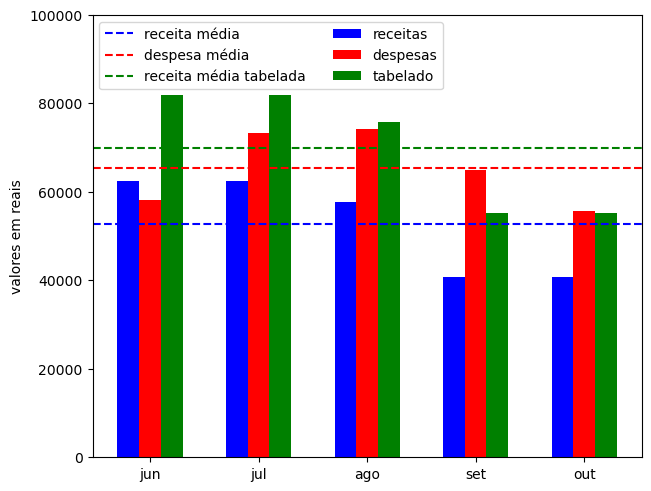

In [59]:
meses = ('jun', 'jul', 'ago', 'set', 'out')
receitas_e_despesas = {
    'receitas': receitas['valores'],
    'despesas': despesas['valores'],
    'tabelado': receitas['tabelado']
}

cores = {'receitas': 'blue', 'despesas': 'red', 'tabelado': 'green'}

x = np.arange(len(meses))
largura = 0.2
passo = 0

fig, ax = plt.subplots(layout='constrained')

ax.axhline(receitas['valores'].mean(), color='blue', linestyle='dashed', label='receita média')
ax.axhline(despesas['valores'].mean(), color='red', linestyle='dashed', label='despesa média')
ax.axhline(receitas['tabelado'].mean(), color='green', linestyle='dashed', label='receita média tabelada')

for tipo, valores in receitas_e_despesas.items():
    offset = largura * passo
    rects = ax.bar(x + offset, valores, largura, label=tipo, color=cores[tipo])
    passo += 1

ax.set_ylabel('valores em reais')
# ax.set_title('Comparação entre receitas e despesas')
ax.set_xticks(x + largura, meses)

ax.set_ylim(0, 100000)

ax.legend(loc='upper left', ncols=2)

fig.savefig('../imagens/comparacao-medias_2.png')